_Author_ : _**Elia Onofri**_

_Title_ : _B-Spline workaround presentation._

_Date_ : 22nd-Nov-2018

---
---
# Le B-Spline
---

Una B-Spline è la rappresentazione di una curva (o meglio di una funzione) a partire dall'interpolazione degli elementi di una base normalizzata dello spazio delle funzioni analitiche.

L'interpolazione ha luogo a partire da una serie di punti del piano detti nodi (o _knots_) i quali giacciono all'interno di un poligono di controllo delimitato da una famiglia di punti $B$.

Il vettore di posizione (_i.e._ la funzione parametrica) di una B-Spline è dunque definito come:
$$
    P(t) = \sum_{i=1}^{n+1}B_iN_{i,k}(t), \qquad 2 \leq k \leq n+1
$$
dove:
 - `B_i` indica l'iesimo punto del poligono di controllo ($n+1$ punti)
 - `N_{i,k}` indica la funzione della base dell'$i$-esima B-Spline normalizzata di ordine $k$ (ovvero grado $k-1$).

In particolare un metodo per calcolare tale base `N_{i, k}` è data dalla formula ricorsiva di _Cox-de Boor_.
$$
    N_{i,k}(t) = \frac{(t-x_i)N_{i,k-1}(t)}{x_{i+k-1}-x_i} + \frac{(x_{i+k}-t)N_{i+1,k-1}(t)}{x_{i+k}-x_{i+1}},
    \qquad \mbox{con} \quad
    N_{i,1}(t) = 
    \begin{cases}
        1  &  \mbox{ se } x_i < t < x_{i+1}\\
        0  &  \mbox{ altrimenti}
    \end{cases}
$$
Ricordiamo che l'interpolazione effettuata dipende dai seguenti parametri:
 - Ogni B-Spline deve passare per $k$ nodi (o _knots_) $x$ (fatta eccezione per quelle di bordo)
 - $P(t)$ e tutte le sue derivate fino alla $k-2$-esima devono essere continue sull'intera curva (in particolare ogni B-Spline deve godere di buon incollamento con le altre) 
 - I nodi $x_i$ devono essere monotoni non decrescenti (_i.e._ $x_i \leq x_{i+1}$)
 - $P(t)$ deve essere un polinomio di grado $k-1$ su ogni intervallo $x_i \leq t < x_{i+1}$
 
In base a queste quattro caratteristiche è possibile determinare (a patto di avere sufficienti knots) delle B-spline di grado arbitrariamente alto.

## Proprietà delle B-Spline
---

Fra le proprietà delle curve troviamo:
 - La somma delle funzioni di base è costante per ogni valore di $t$
 $$
     \sum_{i=1}^{n+1} N_{i,k} = 1
 $$
 - Le funzioni di base sono non negative
 - L'ordine massimo della curva è al più pari al numero $n+1$ di punti del poligono di controllo (da cui il grado massimo è al più $n$)
 - Una curva può essere modificata da una funzione $f$ affine mediante l'applicazione di $f$ ai punti del poligono di controllo
 - La curva giace nello scafo connesso del suo poligono di controllo.

L'ultima affermazione ci permette di scegliere i punti del poligono di controllo dei quarti di circonferenza come:
$$
    \begin{split}
        B_I     =& [(+2, 0), (+2,+2), ( 0,+2)]\\
        B_{II}  =& [( 0,+2), (-2,+2), (-2, 0)]\\
        B_{III} =& [(-2, 0), (-2,-2), ( 0,-2)]\\
        B_{IV}  =& [( 0,-2), (+2,-2), (+2, 0)]\\
        \hline\hline
        B       =& [(+2, 0), (+2,+2), ( 0,+2),\\
                 &\ (-2,+2), (-2, 0), (-2,-2),\\
                 &\ ( 0,-2), (+2,-2), (+2, 0)]
    \end{split}
$$
ed afferma inoltre che una buona scelta per $k$ è $3$ dal momento che in tale maniera la B-Spline risultante è vincolata a passare per i punti $[(+2,0), (0,+2), (-2,0), (0,-2)]$.

Qualora si volesse calcolare una B-Spline di ordine 4 sarà invece necessario duplicare i punti indicati almeno una volta.

## I Nodi (_Knot_)
---

La scelta dei nodi è di cardinale importanza.

In generale se la funzione è di ordine $k$ e la costruzione avviene su un poligono di $n+1$ vertici, il numero di nodi $m$ segue la relazione:
$$
    m = k + n +1
$$

In particolare si usano due tipologie di nodi:
 - **periodici**: Presentano il primo e l'ultimo valore in molteplicità $k$
 - **aperti**: Presentano tutti i valori con molteplicità non fissata (perlopiù 1)

che si presentano in due costruzioni diverse:
 - **uniformi**: ovvero l'intervallo è suddiviso in parti uguali dai nodi
 - **non uniformi**: ovvero l'intervallo fra un nodo ed il successivo può variare (o anche essere zero)

In particolare si hanno quindi 4 classi di nodi:
 - **Periodici Uniformi**: Conducono ad una forma della funzione della base
   $$
       N_{i,k}(t) = N_{i-1,k}(t-1) = N_{i+1,k}(t+1)
   $$
 - **Aperti Uniformi**: presentano uno spaziamento uniforme interno e una molteplicità $k$ sui nodi esterni, ad esempio:
   $$
       k = 3 \qquad [0\ 0\ 0\ 1\ 2\ 3\ 3\ 3]
   $$
   Un caso particolare di questa struttura si ha quando il numero di punti del poligono di controllo è pari al grado della B-Spline: in questo caso non si ottiene altro che una base di Berntein e, conseguentemente, una curva di Bézier.
 - **Aperti Non Uniformi**
 - **Periodici Non Uniformi**

## Funzioni delle Basi per le B-Spline
---

Dal momento che le funzioni `N_{i,k}` definite a partire dalla formula di _Cox-de Boor_ sono in forma ricorsiva su $k$, il calcolo di un set di basi può essere ottimizzato salvando le computazioni necessarie al calcolo di più d'una fra le $n+1$ basi. A questo proposito è bene avere in mente un albero delle dipendenze:
$$
    \begin{matrix}
        N_{i, k}\\
        N_{i, k-1} & N_{i+1, k-1}\\
        N_{i, k-2} & N_{i+1, k-2} & N_{i+2, k-2}\\
        \vdots & \vdots & \vdots & \ddots\\
        N_{i, 1} & N_{i+1, 1} & N_{i+2, 1} & \dots & N_{i+k-1, 1}
    \end{matrix}
    \begin{matrix}
        N_{i-k+1, k} & \dots & N_{i-1, k} & N_{i, k} & N_{i+1, k} & \dots & N_{i+k-1, k}\\
                    & \ddots & \vdots     & \vdots   & \vdots     &       &             \\
                     &       & N_{i-1, 2} & N_{i, 2} & N_{i+1, 2} \\
                     &       &            & N_{i, 1} 
    \end{matrix}
$$

Ne segue che per modificare una B-Spline si possono utilizzare i seguenti artifici:
 - Cambiare il tipo di nodi (e dunque anche la base associata): aperti, periodici, uniformi, non uniformi
 - Modificare l'ordine $k$ della funzione (e dunque il grado $k-1$)
 - Variare la posizione dei punti di controllo
 - Utilizzare un numero maggiore di punti di controllo
 - Ingrandire il numero di nodi

---
---
# Main Function: oknot, obasis, bspline
---

In [2]:
"""
    oknot(n1, k, centre=false, step=1.0)
Generate a `k` degree B-spline open uniform knot vector over `n1 = n+1` control vertices.

An open uniform knot vector has multiplicity of knot values
 at the ends equals to the order `k` of the B-Spline basis function.
Internal knot values are evenly spaced (uniform).
The resulting open uniform basis functions yield curves
 that behave most nearly like Bézier curves.
`centre` Boolean value indicates if the knots are centered in the
 zero value or if them goes from zero to `m-1` where `m=n1+k`.
 If `true` is choosen, then `m` must be odd.
Necessary condition is that `n1>=k` in order to correct build the knot vector.

# Examples
```jldoctest
julia> knot(5, 2)
7-element Array{Float64,1}:
 0.0
 0.0
 1.0
 2.0
 3.0
 4.0
 4.0
```

```jldoctest
julia> knot(6, 3, false, 0.25)
9-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.25
 0.5
 0.75
 1.0
 1.0
 1.0
```

```jldoctest
julia> knot(5, 2, true)
7-element Array{Float64,1}:
 -2.0
 -2.0
 -1.0
 0.0
 1.0
 2.0
 2.0
```
"""

function oknot(n1::Int64, k::Int64, centre=false::Bool, step=1.0::Float64)::Array{Float64}
    local x = Float64[]            # Knot vector output
    local m::Int64 = n1+k          # Dimension of the knot vector
    local backstep::Float64 = 0.0  # backstep is the affine transition parameter for 0-central bases
    
    # Different preparation for centre knot vector
    if centre
        if m%2!=1
            print("ERROR: no centring points available")
            return x
        else
            backstep = step*(n1-k+1)/2
        end
    end
    
    # Local data check
    if n1<k
        print("WARNING: k > n1")
    end
    
    push!(x, 0-backstep)
    for i = 2:m
        if i>k && i<=n1+1
            push!(x, last(x)+step)
        else
            push!(x, last(x))
        end
    end
    return x
end


oknot

In [3]:
"""
    obase(n1, k, t, x[])

Generate a B-spline basis functions `N[]` for a given open knot vectors `x[]`.

A B-Spline basis is a collection of functions of a parameter `t` wich form
 a basis for the vectorial space of functions. The conformation of this set
 higly depends on the choosing of the knots `x[]` the curve is bound to.
The base is computed with _Cox-de Boor_ recursive function applied to the
 base dependency tree in order to optimise the computation.
"""

function obase(n1::Int64, k::Int64, t::Float64, x::Array{Float64})::Array{Float64}
    local tmp = Float64[]       # Bases progressive vector
    local N = Float64[]         # Output vector
    local max_N = n1-1+k        # Needs i+(k-1)|i=n+1 = n+k trivial bases
    local ddep::Float64 = 0.0   # Direct Dependency partial sum
    local fdep::Float64 = 0.0   # Forward Dependency partial sum
    
    # Local check of the knot vector correctness
    if (length(x) != n1+k)
        print("ERROR: incompatibile knot vector with given parameters n+1 = $(n1), k = $(k)")
        return N
    end
    
    # Eval N_{i,1} for i = 1:max_B
    for i=1:max_N
        if (t>=x[i]) && (t<x[i+1])
            append!(tmp, 1)
        else
            append!(tmp, 0)
        end
    end
    
    # Eval higher bases N_{i,deg} for deg = 2:k and i = 1:max_B-deg
    for deg = 2:k
        for i = 1:max_N+1-deg
            # Eval of the direct dependency
            if tmp[i]==0
                ddep = 0.0
            else
                ddep = ((t-x[i])*tmp[i])/(x[i+deg-1]-x[i])
            end
            # Eval of the forward dependency
            if tmp[i+1]==0
                fdep = 0.0
            else
                fdep = ((x[i+deg]-t)*tmp[i+1])/(x[i+deg]-x[i+1])
            end
            # Collection of the dependencies
            tmp[i] = ddep+fdep
        end
    end
    
    # Otherwise last point is zero
    if t == x[n1+k]
        tmp[n1] = 1
    end
    
    # Collect N{1,k} to N{n+1,k} in B
    for i=1:n1
        push!(N, tmp[i]);
    end
    return N;
end
;

In [4]:
"""
    bsplinefunc(n1, k, t, x[], b[])

Evaluate a B-spline function for a given open knot vector `x[]` and controll poligon `b[]` couple.

A B-Spline function is a parametric function (`t` parameter) build over an obasis `N[]`.
It simply evaluates the coordinate `xpos` and `ypos` with the interpolation formula::
```latex
    P(t)[x,y] = \sum_{i=1}^{n+1}B_i[x,y]N_{i,k}(t)
```

"""
function bsplinefunc(n1::Int64, k::Int64, t::Float64, x::Array{Float64, 1}, b::Array{Float64, 2})::Tuple{Float64, Float64}
    local xpos::Float64 = 0.0
    local ypos::Float64 = 0.0
    local N::Array{Float64} = obase(n1, k, t, x)
    for i = 1 : n1
        xpos += b[i,1] * N[i]
        ypos += b[i,2] * N[i]
    end
    return (xpos, ypos)
end
;

In [7]:
"""
    bsplineP(n1, k, x[], b[], step)

Generate a B-spline coordinate set `P` with `t ∈ [0, 1]` increasing by `step`s.
"""
function bsplineP(n1::Int64, k::Int64, x::Array{Float64, 1}, b::Array{Float64, 2}, step::Float64)::Array{Float64, 2}
    local max::Int64 = convert(Int64, ceil(1/step))
    local P::Array{Float64, 2} = zeros(Float64, max, 2)
    local curve(t) = bsplinefunc(n1, k, t, kvec, B)
    local t::Float64 = 0.0
    local i::Int64 = 1
    local tup::Tuple{Float64, Float64} = (0,0)
    for i = 1 : max
        tup = curve(t)
        P[i,1] = tup[1]
        P[i,2] = tup[2]
        t += step
    end
    tup = curve(1.0)
    P[i,1] = tup[1]
    P[i,2] = tup[2]
    return P
end
;

In [6]:
"""
NOT WORKING
"""
function bsplineP(n1::Int64, k::Int64, x::Array{Float64, 1}, b::Array{Float64, 2}, step::Float64)::Array{Float64, 2}
    local P::Array{Float64, 2} = Float64[](2)
    local curve(t) = bsplinefunc(n1, k, t, kvec, B)
    local t::Float64 = 0.0
    while t<1
        push!(P, collect(curve(t)))
        t += step
    end
    push!(P, curve(1.0))
    return P
end

bsplineP

---
---
# Tests
---

In [8]:
using Plots

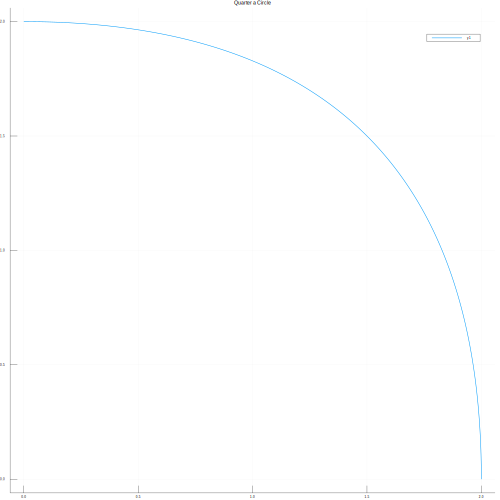

In [44]:
B = [2.0 0.0; 2.0 2.0; 0.0 2.0]::Array{Float64, 2};
n = length(B[:,1])::Int64 -1;
k = 3::Int64;
kvec = oknot(n+1, k)::Array{Float64};

# curve(t::Float64) = bsplinefunc(n+1::Int64, k::Int64, t::Float64, kvec::Array{Float64, 1}, B::Array{Float64, 2})
PointsI = bsplineP(n+1, k, kvec, B, 0.001);
comp_plot = plot(PointsI[:,1], PointsI[:,2], linewidth=2, title="Comparing Real and B-Circle")
quarter_plot = plot(PointsI[:,1], PointsI[:,2], linewidth=2, title="Quarter a Circle", size=(2000, 2000))

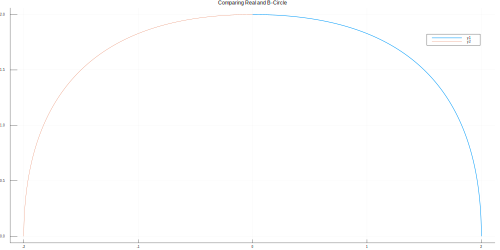

In [45]:
B = [0.0 2.0; -2.0 2.0; -2.0 0.0]::Array{Float64, 2};
PointsII = bsplineP(n+1, k, kvec, B, 0.001);
comp_plot = plot!(comp_plot, PointsII[:,1], PointsII[:,2], size=(2000, 1000))

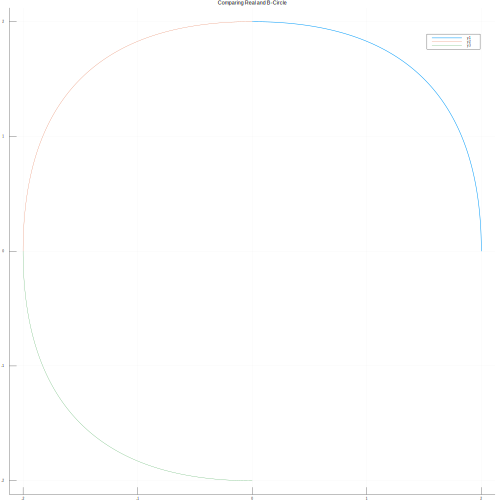

In [46]:
B = [-2.0 0.0; -2.0 -2.0; 0.0 -2.0]::Array{Float64, 2};
PointsIII = bsplineP(n+1, k, kvec, B, 0.001);
comp_plot = plot!(comp_plot, PointsIII[:,1], PointsIII[:,2], size=(2000, 2000))

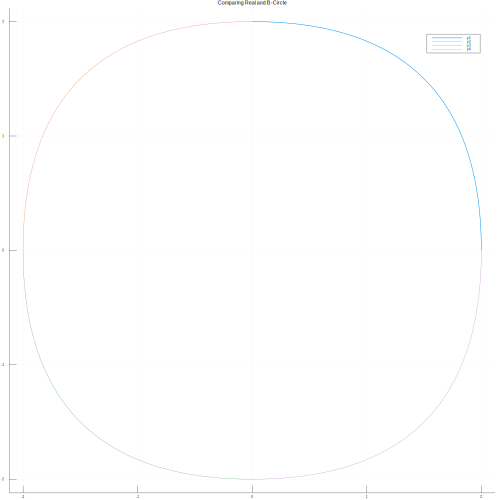

In [47]:
B = [0.0 -2.0; 2.0 -2.0; 2.0 0.0]::Array{Float64, 2};
PointsIV = bsplineP(n+1, k, kvec, B, 0.001);
comp_plot = plot!(comp_plot, PointsIV[:,1], PointsIV[:,2], size=(2000, 2000))

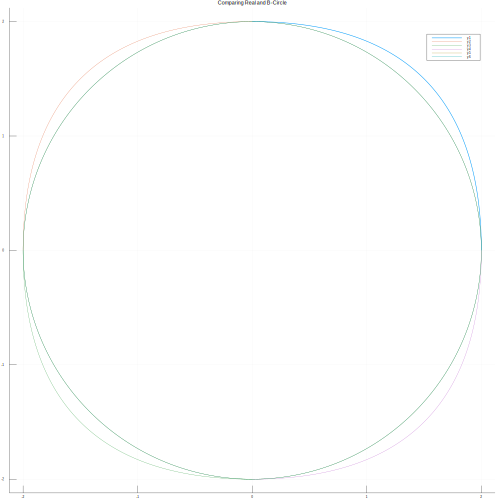

In [62]:
circX = Float64[]
circY = Float64[]
i = 0
while i <= 2π
    push!(circX, 2*cos(i))
    push!(circY, 2*sin(i))
    i += 0.001
end
plot!(comp_plot, circX, circY, size=(2000, 2000))

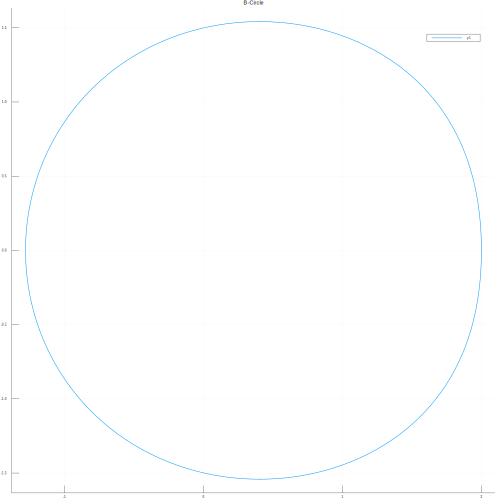

In [49]:
B = [2.0 0.0; 2.0 2.0; 0.0 2.0; -2.0 2.0; -2.0 0.0; -2.0 -2.0; 0.0 -2.0; 2.0 -2.0; 2.0 0.0]::Array{Float64, 2};
n = length(B[:,1])::Int64 -1;
k = 9::Int64;
kvec = oknot(n+1, k)::Array{Float64};

# curve(t::Float64) = bsplinefunc(n+1::Int64, k::Int64, t::Float64, kvec::Array{Float64, 1}, B::Array{Float64, 2})
Points = bsplineP(n+1, k, kvec, B, 0.001);
test_plot = plot(Points[:,1], Points[:,2], linewidth=2, title="B-Circle", size=(2000, 2000))

In [50]:
bsplinefunc(n+1::Int64, k::Int64, 1.0::Float64, kvec::Array{Float64, 1}, B::Array{Float64, 2})

(2.0, 0.0)

In [63]:
circQx = Float64[]
circQy = Float64[]
i = 0
while i <= π/2
    push!(circQx, 0.95*cos(i))
    push!(circQy, 0.95*sin(i))
    i += 0.001
end

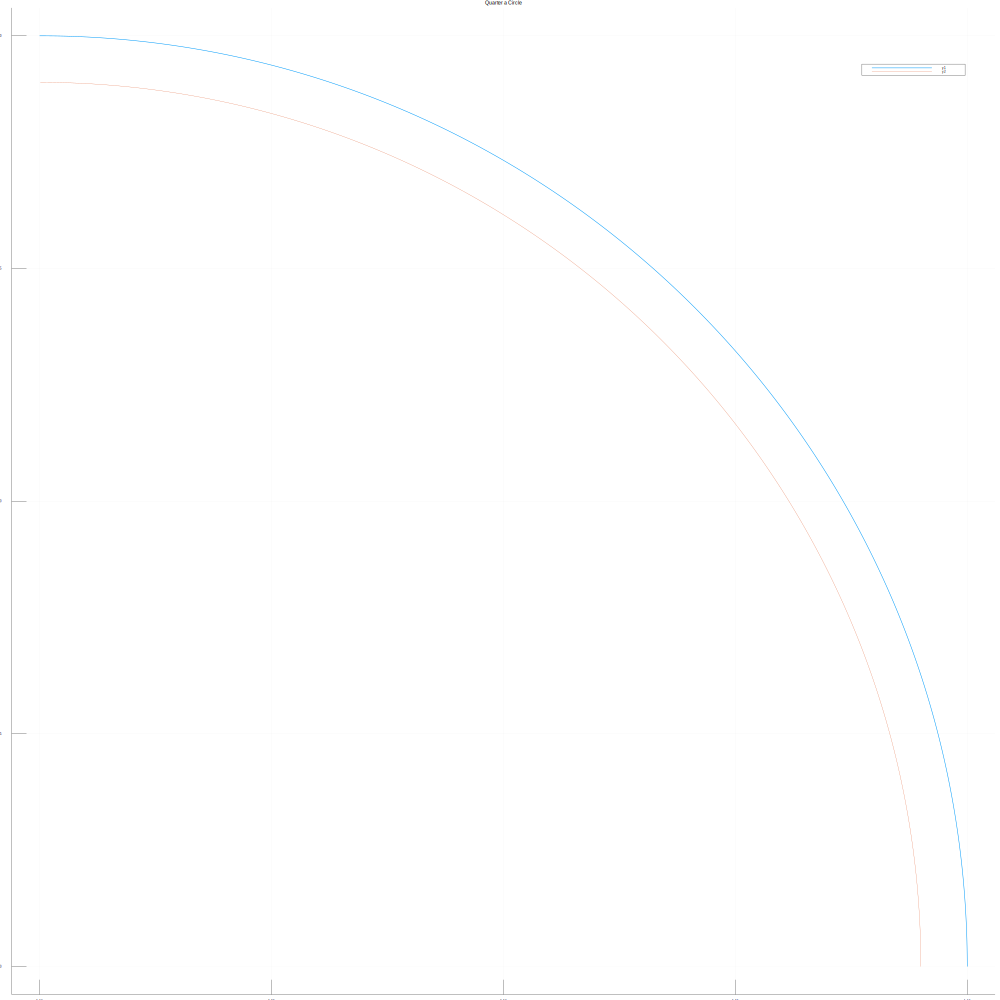

In [66]:
ang=0.552284
B = [1.0 0.0; 1.0 ang; ang 1.0; 0.0 1.0]::Array{Float64, 2};
n = length(B[:,1])::Int64 -1;
k = 4::Int64;
kvec = oknot(n+1, k)::Array{Float64};

# curve(t::Float64) = bsplinefunc(n+1::Int64, k::Int64, t::Float64, kvec::Array{Float64, 1}, B::Array{Float64, 2})
Points4 = bsplineP(n+1, k, kvec, B, 0.001);
point4x_plot = plot(Points4[:,1], Points4[:,2], linewidth=2, title="Quarter a Circle", size=(4000, 4000))
plot!(point4x_plot, circQx, circQy)

---
---
# Rog00 Functions: knot, knotu, basis
---

In [ ]:
"""
    knot(n, c)
Generate a `k` degreee B-spline open uniform knot vector over `n` control vertices.

An open uniform knot vector has multiplicity of knot values
 at the ends equals to the order `k` of the B-Spline basis function.
Internal knot values are evenly spaced.
The resulting open uniform basis functions yield curves
that behave most nearly like Bézier curves.

# Examples
```jldoctest
julia> knot(5, 2)
7-element Array{Int64,1}:
 0
 0
 1
 2
 3
 4
 4
```
"""

function knot(n::Int64,c::Int64)::Array{Int64}
    x=Int64[];
    nplusc::Int64 = n+c;
    nplus2::Int64 = n+2;
    push!(x, 0);
    for i = 2:nplusc
        if i>c && i<nplus2
            push!(x, last(x)+1);
        else
            push!(x, last(x));
        end
    end
    return x
end

In [ ]:
"""
    knotu(n, c)
Generate a B-spline periodic uniform knot vector over `n` control vertices.

In a periodic uniform knot vector the knot values are evenly spaced.
Moreover each base is a translate of the others as it could be defined like:
```tex
N_{i, k}(t) = N_{i-1, k}(t-1) = N_{i+1, k}(t+1)
```

```jldoctest
julia> knotu(5, 2)
7-element Array{Int64,1}:
 0
 1
 2
 3
 4
 5
 6
```
"""

function knotu(n::Int64, c::Int64)::Array{Int64}
    x=Int64[];
    nplusc=n+c;
    nplus2=n+2;
    for i=1:nplusc
        push!(x, i-1);
    end
    return x;
end

In [ ]:
function basis(c::Int64, t::Float64, npts::Int64, x::Array{Float64})::Array{Float64}
    temp = Array{Float64}(36);
    n = Float64[];
    nplusc = npts + c;
    
#    print(knot vector is );
#    for i=1:nplusc
#        print(& &, i, x[i]);
#    end
#    print(t is &, t);
    
    # calculate the first order basis functions n[i][1]
    
    for i=1:nplusc-1
        if (t>=x[i])&&(t<x[i+1])
            temp[i] = 1;
        else
            temp[i] = 0;
        end
    end
    
    # calculate the higher order basis functions
    for k=2:c
        for i=1:nplusc-k
            if temp[i] != 0    # if the lower order basis function is zero skip the calculation
                d = ((t-x[i])*temp[i])/(x[i+k-1]-x[i]);
            else
                d = 0;
            end
            if temp[i+1] != 0    # if the lower order basis function is zero skip the calculation
                e = ((x[i+k]-t)*temp[i+1])/(x[i+k]-x[i+1]);
            else
                e = 0;
            end
            temp[i] = d+e;
        end
    end
    
    if t == x[nplusc]    # pick the last point
        temp[npts] = 1;
    end
    
    # put in n array
    for i=1:npts
        push!(n, temp[i]);
    end
    return n;
end

---
---
# Other Tests
---

In [ ]:
obase(n+1, k, 0.75, kvec) == basis(k, 0.75, n+1, kvec)

---
---
### Deprecated
---

In [ ]:
function base(i::Int64, k::Int64, t::Float64, x::Array{Float64})
    if k==1
        if t>x[i] && t<x[i+1]
            return 1
        else
            return 0
        end
    else
        return ((t-x[i])*base(i, k-1, t, x))/(x[i+k-1]-x[i]) + ((x[i+k]-t)*base(i+1,k-1,t,x))/(x[i+k]-x[i+1])
    end
end

In [ ]:
function position(t::Float64, B::Array{Float64, 2}, x::Array{Float64})
    local acc = 0.0;
    local n = length(B[:,1])::Int64
    for i = 1 : n+1
        for k = 2 : n+1
            acc = acc + B[i, 1] + base(i,k,t,x)
        end
    end
end

In [ ]:
miabase(t) = base()

In [ ]:
b(t) = basis(k, t, n, kvec)

In [ ]:
i = 0.0;
while i < 1 
   print(basis(2, i, 3, knotVec))
    i += 0.1
end

In [29]:
?oknot

search:



```
oknot(n1, k, centre=false, step=1.0)
```

Generate a `k` degree B-spline open uniform knot vector over `n1 = n+1` control vertices.

An open uniform knot vector has multiplicity of knot values  at the ends equals to the order `k` of the B-Spline basis function. Internal knot values are evenly spaced (uniform). The resulting open uniform basis functions yield curves  that behave most nearly like Bézier curves. `centre` Boolean value indicates if the knots are centered in the  zero value or if them goes from zero to `m-1` where `m=n1+k`.  If `true` is choosen, then `m` must be odd. Necessary condition is that `n1>=k` in order to correct build the knot vector.

# Examples

```jldoctest
julia> knot(5, 2)
7-element Array{Float64,1}:
 0.0
 0.0
 1.0
 2.0
 3.0
 4.0
 4.0
```

```jldoctest
julia> knot(6, 3, false, 0.25)
9-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.25
 0.5
 0.75
 1.0
 1.0
 1.0
```

```jldoctest
julia> knot(5, 2, true)
7-element Array{Float64,1}:
 -2.0
 -2.0
 -1.0
 0.0
 1.0
 2.0
 2.0
```
